In [2]:
from pymab.policies.ucb import DiscountedUCBPolicy, SlidingWindowUCBPolicy, StationaryUCBPolicy
from pymab.game import EnvironmentChangeType, Game

In [3]:
n_bandits = 10
n_episodes = 500
n_steps = 1000
# n_episodes = 10
# n_steps = 20

In [4]:
ucb_stationary_policy = StationaryUCBPolicy(
    n_bandits=10,
    c=1,
)

ucb_sliding_window_policy_50 = SlidingWindowUCBPolicy(
    n_bandits=10,
    c=1,
    window_size=50,
)
ucb_sliding_window_policy_100 = SlidingWindowUCBPolicy(
    n_bandits=10,
    c=1,
    window_size=100,
)

ucb_sliding_window_policy_200 = SlidingWindowUCBPolicy(
    n_bandits=10,
    c=1,
    window_size=200,
)

ucb_discounted_policy_0_9 = DiscountedUCBPolicy(
    n_bandits=10,
    c=1,
    discount_factor=0.9,
)
ucb_discounted_policy_0_5 = DiscountedUCBPolicy(
    n_bandits=10,
    c=1,
    discount_factor=0.5,
)
ucb_discounted_policy_0_1 = DiscountedUCBPolicy(
    n_bandits=10,
    c=1,
    discount_factor=0.1,
)

policies = [
        ucb_stationary_policy, 
        ucb_sliding_window_policy_50,
        ucb_sliding_window_policy_100, 
        ucb_sliding_window_policy_200, 
        ucb_discounted_policy_0_1, 
        ucb_discounted_policy_0_5, 
        ucb_discounted_policy_0_9
    ]

## Non-stationary environment with small gradual changes of 0.01 
Changes in the reward distribution of the arms are small and gradual. The reward distribution of the arms changes by 0.01 every step.

In [5]:
non_stationary_gradual_game = Game(
    n_episodes=n_episodes,
    n_steps=n_steps,
    policies=policies,
    n_bandits=n_bandits,
    environment_change=EnvironmentChangeType.GRADUAL,
    change_params={'change_rate': 0.01}
)

In [6]:
non_stationary_gradual_game.game_loop()

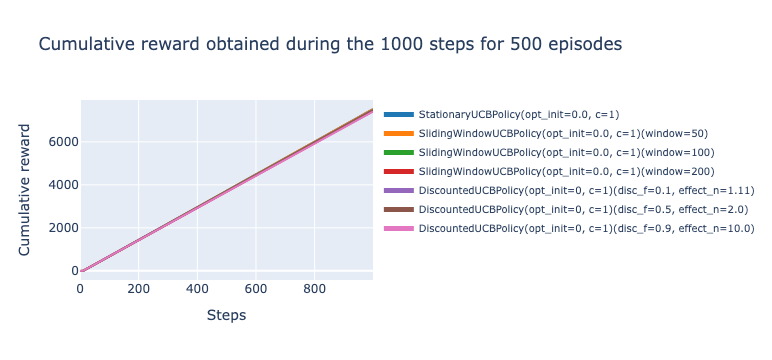

In [7]:
non_stationary_gradual_game.plot_average_reward_by_step()

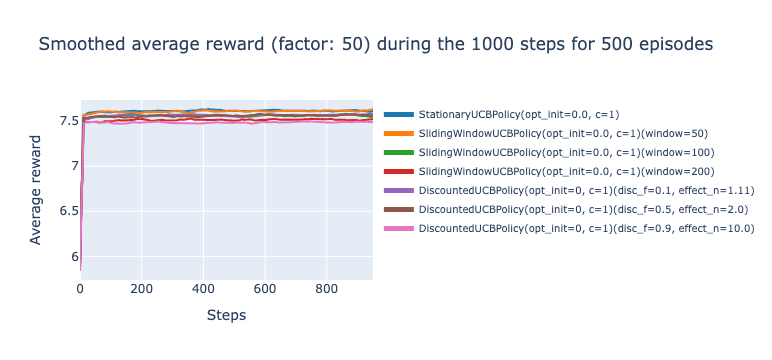

In [8]:
non_stationary_gradual_game.plot_average_reward_by_step_smoothed()

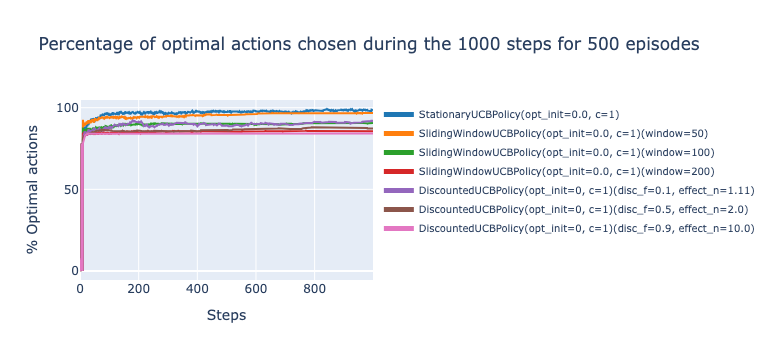

In [9]:
non_stationary_gradual_game.plot_rate_optimal_actions_by_step()

In [10]:
non_stationary_gradual_game.plot_cumulative_regret_by_step()

In [11]:
non_stationary_abrupt_game = Game(
    n_episodes=n_episodes,
    n_steps=n_steps,
    policies=policies,
    n_bandits=n_bandits,
    environment_change=EnvironmentChangeType.ABRUPT,
    change_params={'change_frequency': 100, 'change_magnitude': 0.5},
)

In [12]:
non_stationary_abrupt_game.game_loop()

In [13]:
non_stationary_abrupt_game.plot_average_reward_by_step()

In [14]:
non_stationary_abrupt_game.plot_average_reward_by_step_smoothed()

In [15]:
non_stationary_abrupt_game.plot_rate_optimal_actions_by_step()

In [16]:
non_stationary_abrupt_game.plot_cumulative_regret_by_step()

In [17]:
non_stationary_abrupt_game.plot_optimal_arm_evolution()

AttributeError: 'Game' object has no attribute 'plot_optimal_arm_evolution'

In [ ]:
stationary_game = Game(
    n_episodes=n_episodes,
    n_steps=n_steps,
    policies=policies,
    n_bandits=n_bandits,
)

In [ ]:
stationary_game.game_loop()

In [ ]:
stationary_game.plot_average_reward_by_step()

In [ ]:
stationary_game.plot_average_reward_by_step_smoothed()

In [ ]:
stationary_game.plot_rate_optimal_actions_by_step()

In [ ]:
stationary_game.plot_cumulative_regret_by_step()

## Summary
### Stationary Environment
In a stationary environment, the true underlying reward distributions of the arms do not change over time.

### Non-Stationary Environment
In a non-stationary environment, the true underlying reward distributions of the arms change over time.

### Results Analysis
* In the no-stationary scenario, the Sliding Window UCB policy performs better than the other two policies. This is because our reward distribution changes every 100 steps, and the Sliding Window UCB policy adapts to this change faster than the other two policies, by maintaining a sliding window of the last 100 steps. However, the Discounted UCB policy performs slightly worse than the standard UCB, probably because it still gives some value to the older .